## Fixed-point iteration

#### Definition

A function $g(x)$ has a fixed point at $x = p$ if $p = g(p)$.<br><br>


* This is called a fixed point because $g(g(p)) = g(p) = p$, or more generally $g^{(k)}(p) = p$ (the $k$th composition of $g$ with itself).
* If $g(x)$ has a fixed point at $x = p$ then $f(x) = p-g(p)$ has a root at $x = p$.
* If $f(x)$ has a zero at $x = p$ then the function $g(x) = x - f(x)$ has a fixed point at $x = p$.

#### Example

Find the fixed point(s) of $g(x) = 1 + \sqrt{x}$, $x \geq 0$.

#### Example

Compute the root of $f(x) = 1 + \sqrt{x} -x$.

In [35]:
g = @(x) 1 + sqrt(x);
exact = ((1+sqrt(5))/2)^2;
format long
a = .1;
for i = 1:6
  a = g(a)
end
abs(a-exact)

a =

   1.316227766016838


a =

   2.147269700644464


a =

   2.465356509742412


a =

   2.570145378537418


a =

   2.603167295866972


a =

   2.613433387489850


ans =

   0.004600601260045


For the bisection method, we used the Intermediate Value Theorem to guarantee a zero (or root) of the function under consideration.  We now have a result for fixed-points:

#### Theorem 1

1. If $g \in C[a,b]$ and $g(x) \in [a,b]$ for all $x \in [a,b]$, then $g$ has at least one fixed point. 
2. If, in addition, $g'(x)$ exists on $(a,b)$ and there is a positive constant $K < 1$ with

$$ |g'(x)| \leq K, \quad \text{for all} \quad x \in (a,b),$$

then there is exactly one fixed point in $[a,b]$.  

#### Proof

__Part 1__: Let $f(x) = x - g(x)$.  Then $f(a) = a - g(a) \leq 0$ because $g(a) \in [a,b]$ or $g(a) \geq a$.  Also, $f(b) = b - g(b) \geq 0$ because $g(b) \in [a,b]$ or $g(b) \leq b$.  Then because $f(x)$ is continuous, the Intermediate Value Theorem guarantees that there is one root of $f$ in $[a,b]$ and therefore $g$ has a fixed point in $[a,b]$

__Part 2__ By Part 1, we know that $g(x)$ has at least one fixed point $p \in [a,b]$.  Let us assume there is another fixed point $p^* \in [a,b]$, $p^* \neq p$.  Then $f(x) = x - g(x)$ has two roots in $[a,b]$.  Recall, Rolle's Theorem. It states that $f'(c) = 0$ for some point $c$ that lies between $p$ and $p^*$:

$$ 0 = f'(c) = 1 - g'(c) \Longrightarrow g'(c) = 1.$$

This violates our assumptions and $p^*$ cannot exist.

#### Example

Using this theorem, show that $g(x) = 1 + \sqrt{x}$ has one and only one fixed point on $[1,3]$.

This theorem gives a sufficient condition for a unique fixed point to exist.  It does not give a necessary condition.  Consider

$$g(x) = e^{-x}, \quad x \in [0,1].$$

Because $g$ is decreasing, $g(0) = 1 \in [0,1]$, and $g(1) > 0$ we are guaranteed a fixed point on $[0,1]$.  To apply the theorem we look at $g'(x) = - e^{-x}$.

On the interval $[0,1]$, $|g'(x)| \leq 1$ and it attains the value one at $x = 0$.  We cannot apply the theorem (need a strict inequality) to state uniqueness of the fixed point.

But if we plot $g(x)$ and the function $h(x) = x$, it is clear that they cross only once.

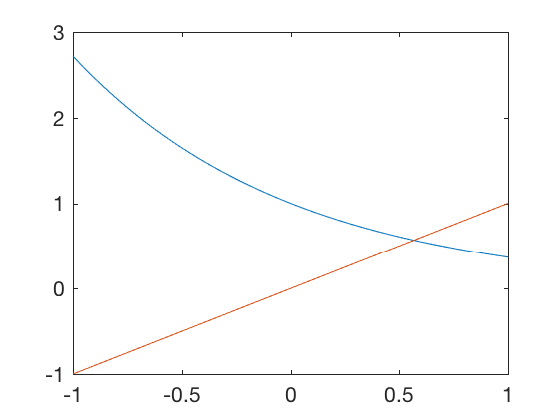

In [29]:
x = linspace(-1,1,100);
plot(x,exp(-x));
hold on
plot(x,x)

#### Definition

Suppose that $g(x)$ has a unique fixed point on the interval $[a,b]$.  Given $p_0 \in [a,b]$ (an initial guesss), define $p_n = g(p_{n-1})$ for $n \geq 1$.

<br>

If the sequence $p_n \to p$ as $n \to \infty$, and if $g$ is continuous

$$ p = \lim_{n\to\infty} p_n = \lim_{n \to \infty} g(p_{n-1}) = g \left( \lim_{n \to \infty} g_{n-1} \right) = g(p).$$

The technique of constructing the sequence $\{g_n\}_{n = 1}^\infty$ is called __fixed-point iteration__.  

#### The Algorithm

In [ ]:
INPUT Initial guess p0; tolerance TOL; maximum number of iterations Nmax;

OUTPUT approximate solution p, or message of failure

STEP 1: Set i = 1; p = g(p0); gold = p0; 
STEP 2: While i <= Nmax, do STEPS 3-6.
    STEP 3: If |p-pold| < TOL then
        OUTPUT(p);
        STOP.
    STEP 4: Set pold = p; % Save the old value of p
    STEP 5: SET p = g(p); % Update p
    STEP 6: Set i = i + 1;
STEP 7: OUTPUT('Method failed after Nmax iterations, Nmax = ',Nmax);
    STOP.
    

### Error Analysis

Now we begin the real work.  To understand when the fixed point iteration converges, and at what rate.

#### Theorem 2 (Convergence)

Let $g \in C[a,b]$ be such that $g(x) \in [a,b]$ for all $x \in [a,b]$.  Suppose, in addition, that $g'$ exists on $(a,b)$ and there exists $0 \leq K < $ such that

$$ |g'(x)| \leq K, \quad \text{ for all } ~~ x \in [a,b]. $$

The for any number $p_0 \in [a,b]$, the sequence $p_n \to p$ where $p$ is the unique fixed point in $[a,b]$. 

Before we prove Theorem 2, we recall a consequence of Taylor's theorem:  If $g \in C[a,b]$ is diffentiable on $(a,b)$ and $|g'(x)| \leq K$ for all $x \in [a,b]$ then

$$ |g(c) - g(d)| \leq K|c-d|. $$


#### Proof

From Theorem 2, we know that the unique fixed point $p$ exists.  Then

$$ |p_n - p| = |g(p_{n-1}) - g(p)| \leq K|p_{n-1} - p| \leq K^2 |p_{n-2} - p| \leq K^n |p_0 - p|. $$

It also follows that $|p_0 - p| \leq b-a$, the length of the interval that contains them both.  And so

$$|p_n - p| \leq K^n (b-a), \quad \text{or} \quad p_n = p + O(K^n),$$

as $n \to \infty$.  Convergence follows because $K < 1$.

The proof of this directly gives the following:

#### Corollary

Under the hypotheses of Theorem 2, for any point $p_0 \in [a,b]$ the sequence $\{p_n\}_{n=1}^\infty$ given by $p_n = g(p_{n-1})$ converges to the unique fixed point $p$ at rate $K^n$

#### Example

Use fixed-point iteration to compute $\log 2$ using only elementary operations and the exponential function.  Find the rate of convergence.

Hint: Consider $e^{-x} = 1/2$.